In [21]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [22]:
apple=pd.read_csv('C:/Users/keren/OneDrive/Desktop/apple.csv')
apple.head()

,datetime,open,high,low,close,volume
0,02-01-1998 16:00,0.12,0.12,0.12,0.12,14512400
1,02-01-1998 17:00,0.12,0.13,0.12,0.12,52987312
2,02-01-1998 18:00,0.12,0.13,0.12,0.13,23746800
3,02-01-1998 19:00,0.13,0.13,0.13,0.13,21644000
4,02-01-1998 20:00,0.13,0.13,0.13,0.13,11933600


In [23]:
apple.shape

(46751, 6)

In [24]:
apple.describe()

,open,high,low,close,volume
count,46751.000000,46751.000000,46751.000000,46751.000000,4.675100e+04
mean,36.095121,36.222664,35.963805,36.098219,1.379944e+07
std,53.308437,53.488980,53.126119,53.314363,1.446286e+07
min,0.120000,0.120000,0.120000,0.120000,7.000000e+02
25%,1.040000,1.050000,1.030000,1.040000,4.914205e+06
50%,12.290000,12.310000,12.260000,12.290000,9.269400e+06
75%,40.520000,40.665000,40.365000,40.520000,1.762751e+07
max,199.190000,199.620000,198.660000,199.200000,4.355540e+08


In [25]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46751 entries, 0 to 46750
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  46751 non-null  object 
 1   open      46751 non-null  float64
 2   high      46751 non-null  float64
 3   low       46751 non-null  float64
 4   close     46751 non-null  float64
 5   volume    46751 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 2.1+ MB


In [27]:
apple['datetime'].min(),apple['datetime'].max()
apple=apple.sort_values('datetime')
apple

,datetime,open,high,low,close,volume
42353,01-01-2022 00:00,177.64,177.64,177.57,177.57,6557880
1893,01-02-1999 16:00,0.37,0.37,0.37,0.37,14260400
1894,01-02-1999 17:00,0.37,0.37,0.36,0.36,15918000
1895,01-02-1999 18:00,0.36,0.36,0.36,0.36,9466800
1896,01-02-1999 19:00,0.36,0.36,0.36,0.36,4505200
...,...,...,...,...,...,...
42349,31-12-2021 20:00,177.71,177.84,177.26,177.56,4491742
42350,31-12-2021 21:00,177.56,177.91,177.36,177.55,4531717
42351,31-12-2021 22:00,177.55,177.75,177.29,177.61,4521085
42352,31-12-2021 23:00,177.61,178.27,177.44,177.64,11316337


In [28]:
apple.isnull().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

In [31]:
apple=apple.groupby('datetime')['volume'].sum().reset_index()

In [33]:
apple['datetime']=pd.to_datetime(apple['datetime'],format='mixed')
apple.set_index('datetime',inplace=True)
apple.index

DatetimeIndex(['2022-01-01 00:00:00', '1999-01-02 16:00:00',
               '1999-01-02 17:00:00', '1999-01-02 18:00:00',
               '1999-01-02 19:00:00', '1999-01-02 20:00:00',
               '1999-01-02 21:00:00', '1999-01-02 22:00:00',
               '2000-01-02 16:00:00', '2000-01-02 17:00:00',
               ...
               '2020-12-31 22:00:00', '2021-12-31 00:00:00',
               '2021-12-31 17:00:00', '2021-12-31 18:00:00',
               '2021-12-31 19:00:00', '2021-12-31 20:00:00',
               '2021-12-31 21:00:00', '2021-12-31 22:00:00',
               '2021-12-31 23:00:00', '2022-12-31 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=46751, freq=None)

In [35]:
apple.head()

,volume
datetime,
2022-01-01 00:00:00,6557880
1999-01-02 16:00:00,14260400
1999-01-02 17:00:00,15918000
1999-01-02 18:00:00,9466800
1999-01-02 19:00:00,4505200


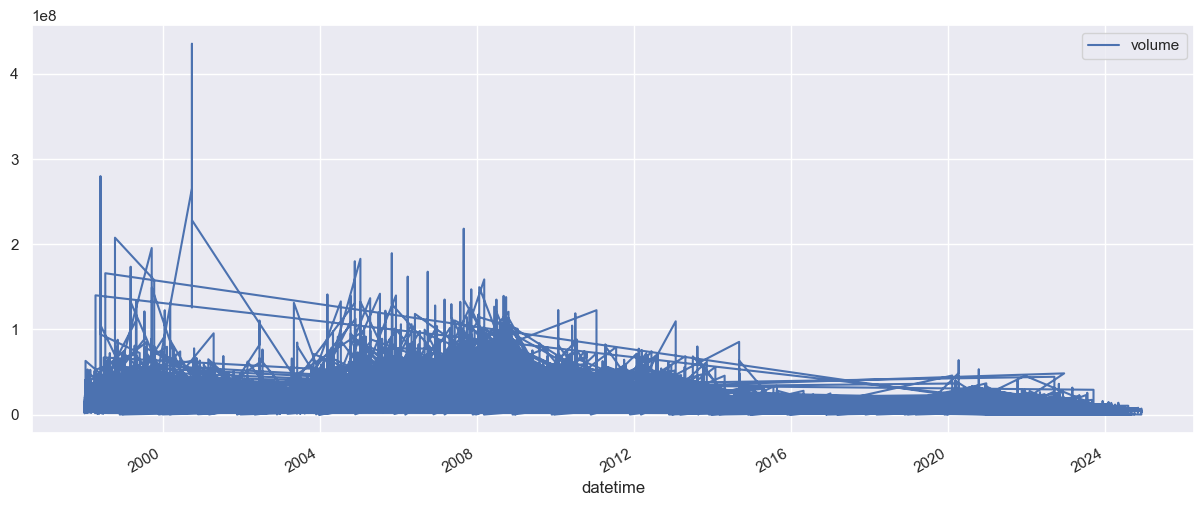

In [36]:
apple.plot(figsize=(15,6))
plt.show()

In [40]:
y=apple['volume'].resample('MS').mean()
y

datetime
1998-01-01    1.153209e+07
1998-02-01    1.548132e+07
1998-03-01    1.165560e+07
1998-04-01    1.566225e+07
1998-05-01    1.134284e+07
                  ...     
2024-08-01    4.958722e+06
2024-09-01    3.290828e+06
2024-10-01    3.823532e+06
2024-11-01    5.098855e+06
2024-12-01    4.013460e+06
Freq: MS, Name: volume, Length: 324, dtype: float64

In [41]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 330.3 kB/s eta 0:00:30
   ---------------------------------------- 0.0/9.8 MB 495.5 kB/s eta 0:00:20
    --------------------------------------- 0.2/9.8 MB 1.2 MB/s eta 0:00:08
   - -------------------------------------- 0.4/9.8 MB 2.3 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/9.8 MB 3.9 MB/s eta 0:00:03
   ------ --------------------------------- 1.5/9.8 MB 5.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.8 MB 5.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.7/9.8 MB 5.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.7/9.8 MB 5.5 MB/s eta 0:00:02
   ---------- ----------------------------- 2.5/9.8 MB 5.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.8 MB 5.7 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/9.8 MB 6.2 MB/s eta 0:00:02
   ------------

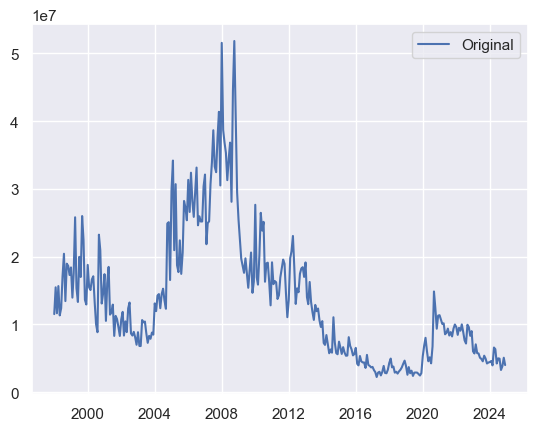

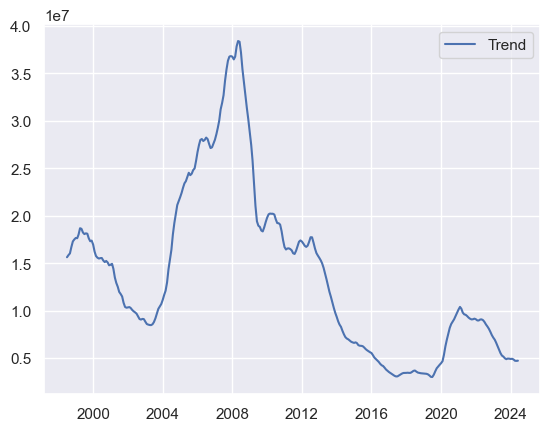

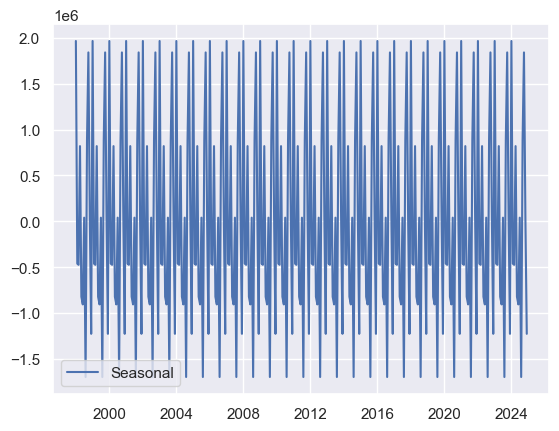

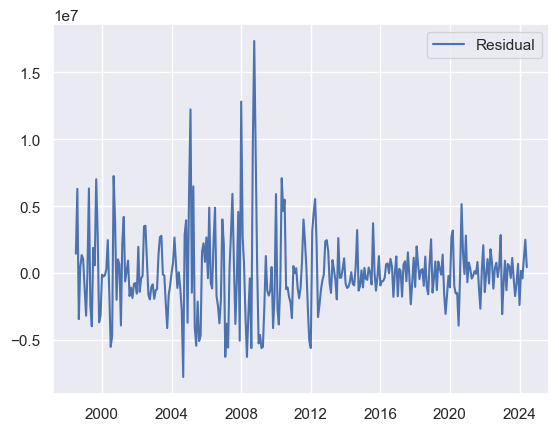

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)
plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')


In [43]:
from statsmodels.tsa.stattools import adfuller

In [44]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
#series = Series.from_csv('daily-total-female-births.csv', header=0)
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.375306
p-value: 0.594056
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572


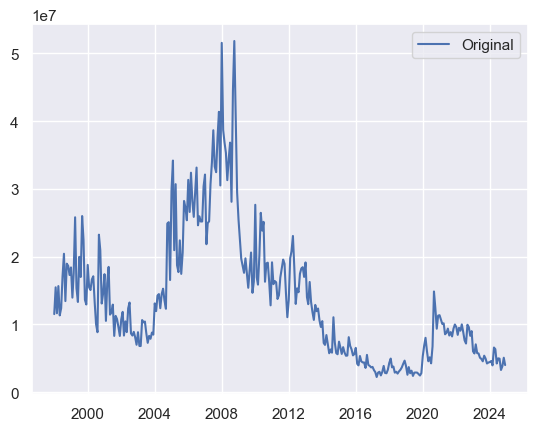

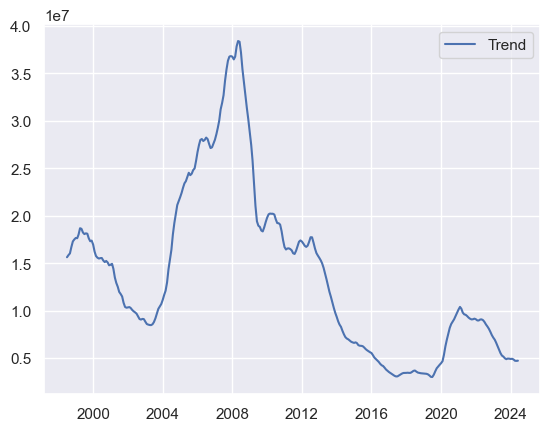

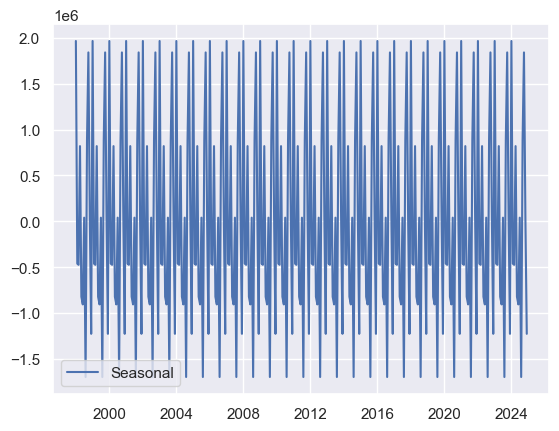

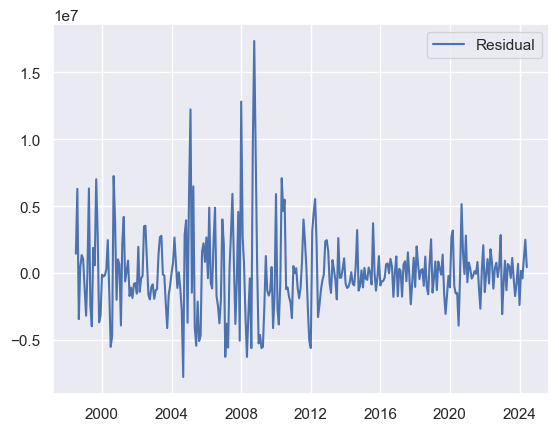

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')